# Iris flowers

In [1]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris = datasets.load_iris()
print(iris.keys())
x = pd.DataFrame(iris['data'], columns=iris['feature_names'])
print('target_names: '+str(iris['target_names']))
y = pd.DataFrame(iris['target'], columns=['target'])
iris_data = pd.concat([x, y], axis=1)
iris_data = iris_data[['sepal length (cm)', 'petal length (cm)', 'target']]
iris_data = iris_data[iris_data['target'].isin([0,1])]
iris_data.head()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])
target_names: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),petal length (cm),target
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0


分割資料成 train 和 test

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_data[['sepal length (cm)', 'petal length (cm)']],
                                                    iris_data[['target']],
                                                    test_size=0.3,
                                                    random_state=0)

 然後將分割後的特徵標準化

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

使用 SVC 模型，用線性 kernel

In [5]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', probability=True)
svm.fit(X_train_std, y_train['target'].values)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

預測結果

In [6]:
svm.predict(X_test_std)

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1])

In [7]:
y_test['target'].values

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1])

把預測的結果和 y_test 做比較

In [8]:
error = 0
for i, v in enumerate(svm.predict(X_test_std)):
    if v != y_test['target'].values[i]:
        error += 1
print(error)

0


查看預測機率，分成 A B 兩類，第一欄是預測成 A 的機率，第二欄是預測成 B 的機率，P(A) + P(B) = 1

In [9]:
svm.predict_proba(X_test_std)

array([[0.95259877, 0.04740123],
       [0.00739161, 0.99260839],
       [0.97550064, 0.02449936],
       [0.00636652, 0.99363348],
       [0.01656288, 0.98343712],
       [0.11816503, 0.88183497],
       [0.98542096, 0.01457904],
       [0.00474249, 0.99525751],
       [0.00856103, 0.99143897],
       [0.01537094, 0.98462906],
       [0.02377542, 0.97622458],
       [0.0295414 , 0.9704586 ],
       [0.00794609, 0.99205391],
       [0.98175735, 0.01824265],
       [0.96461787, 0.03538213],
       [0.9451753 , 0.0548247 ],
       [0.98914468, 0.01085532],
       [0.88072229, 0.11927771],
       [0.98179853, 0.01820147],
       [0.95898864, 0.04101136],
       [0.95259877, 0.04740123],
       [0.03411543, 0.96588457],
       [0.95256364, 0.04743636],
       [0.03665145, 0.96334855],
       [0.96944316, 0.03055684],
       [0.97163899, 0.02836101],
       [0.96459143, 0.03540857],
       [0.02057235, 0.97942765],
       [0.03933958, 0.96066042],
       [0.00592603, 0.99407397]])

畫圖

In [10]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1 # 決定圖片的 x 軸上下限
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1 # 決定圖片的 y 軸上下限
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution)) # 建立格子點
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    # reval() 是把高維度降成一維，新的陣列是個 2 row 的陣列
    # 但是我們要把 xx1 的元素放在第一欄 xx2 放在第二欄，所以要轉置
    # Z 只是每個格子點用分類器預測出來的結果
    Z = Z.reshape(xx1.shape) # 恢復成原本的維度
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap) # 會畫出一條線，將平面切割成兩個區域
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)): # 先畫出所有 y=0 的點，再畫出所有 y=1 的點
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    edgecolor='black',
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

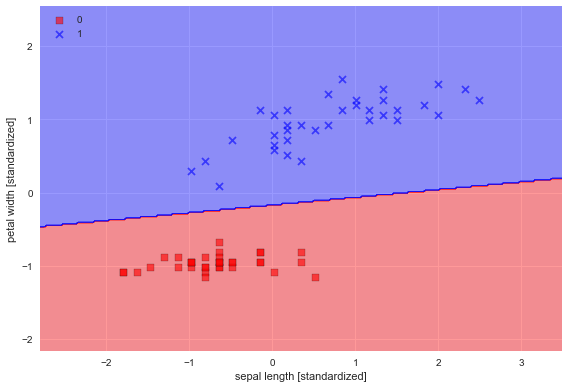

In [11]:
plt.style.use('seaborn')
plot_decision_regions(X_train_std, y_train['target'].values, classifier=svm)
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()